# Диаграмма рассеяния (scatter plot)

При рассмотрении примеров работы библиотеки seaborn, нам также понадобятся библиотеки matplotlib, pandas и numpy.

**Импорт библиотек**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
%config InlineBackend.figure_format = 'svg'

Данный код позволяет отображать графики в формате SVG (Scalable Vector Graphics), то есть в формате векторной графики. SVG основан на векторах, и это означает, что изображения состоят из линий и форм, а не пикселей. Это позволяет масштабировать изображения без потери качества.

**Диаграмма рассеяния** показывает взаимосвязь двух переменных в виде точек на графике. В библиотеке *seaborn* диаграммы рассеяния строятся функцией `sns.scatterplot()`.

**scatterplot**

Основные параметры этой функции:
 - `data`: DataFrame или массив с данными;
 - `x`: название столбца или вектор данных для оси X;
 - `y`: название столбца или вектор данных для оси Y;
 - `hue`: название столбца или вектор данных для группировки точек по цвету;
 - `size`: название столбца или вектор данных для изменения размера точек;
 - `style`: название столбца или вектор данных для изменения стиля точек (например, разные формы);
 - `palette`: цветовая палитра для переменной hue;
 - `hue_order`: задаёт порядок отображения категорий для переменной hue;
 - `hue_norm`: позволяет нормализовать данные переменной hue;
 - `sizes`: диапазон размеров для переменной size;
 - `size_order`: задаёт порядок отображения категорий для переменной size;
 - `size_norm`: позволяет нормализовать данные переменной size, задавая диапазон значений;
 - `markers`: список стилей маркеров для переменной style;
 - `style_order`: задаёт порядок отображения категорий для переменной style.

Рассмотрим на примере, используя данные из встроенных в библиотеку *seaborn* датасетов. Используем датасет *penguins*, содержащий информацию о трёх видах пингвинов, обитающих на островах: Biscoe, Dream, Torgersen.

In [14]:
penguins = sns.load_dataset('penguins').dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [15]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


Датасет **penguins** содержит следующие столбцы:
- `species` - вид пингвина (Adelie, Chinstrap, Gentoo);
- `island` - остров, где были собраны данные (Biscoe, Dream, Torgersen);
- `bill_length_mm` - длина клюва в миллиметрах;
- `bill_depth_mm` - глубина клюва в миллиметрах;
- `flipper_length_mm` - длина ласт в миллиметрах;
- `body_mass_g` - масса тела в граммах;
- `sex` - пол пингвина (Male, Female).

Построим диаграмму рассеяния, на которой по оси X будут отображены значения длины клюва, а по оси Y - значения глубины клюва.

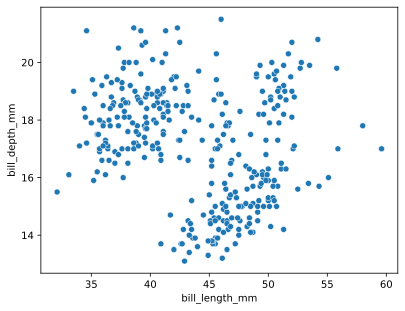

In [17]:
sns.scatterplot(data=penguins,
                x='bill_length_mm',
                y='bill_depth_mm'
               )

plt.show()

# Получить аналогичный результат можно так:
# sns.scatterplot(x=penguins['bill_length_mm'], y=penguins['bill_depth_mm'])

На данный момент на нашем построенном графике нет сетки координат. Отображение координатной сетки зависит от выбранного стиля. Стиль отображения можно изменять функцией `sns.set_style()`. Белый стиль без отображения координатной сетки называется `white`. Чтобы на графике отображались линии сетки координат, надо функции `sns.set_style()` передать атрибут `whitegrid`:

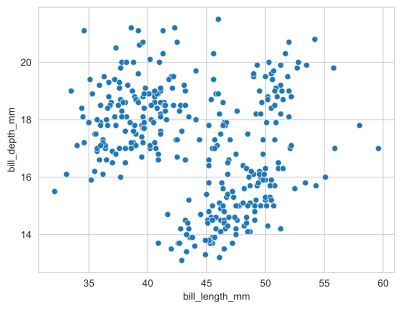

In [18]:
sns.set_style('whitegrid')
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm');

В библиотеке *seaborn* можно также использовать "тёмную" тему с линиями сетки координат, которая называется `darkgrid`:

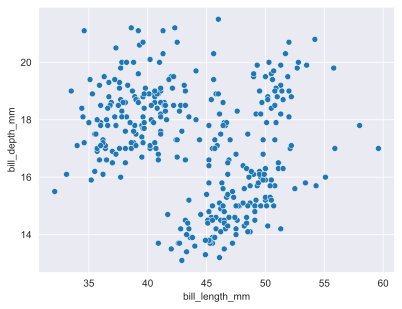

In [19]:
sns.set_style('darkgrid')
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm');

Помимо выбора стилей, можно изменять цвет, размер и форму точек на графике.

**Параметр color**

Цвет точек меняется параметром `color`, которому передаётся наименование выбранного цвета или его *HEX-код*. Например, сделаем точки на графике зелёного цвета:

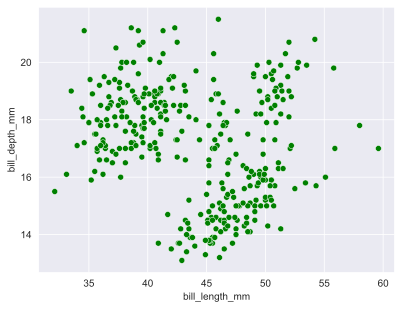

In [20]:
sns.scatterplot(data=penguins,
                x='bill_length_mm',
                y='bill_depth_mm',
                color='green');

**Параметр alpha**

Параметр `alpha` управляет прозрачностью точек на графике рассеяния. Этот параметр принимает значение от 0 до 1, где 0 означает полностью прозрачные точки, а 1 - полностью непрозрачные. Настройка прозрачности точек может быть полезна для улучшения читаемости графика, особенно когда точки перекрываются.

Для примера сделаем точки полупрозрачными:

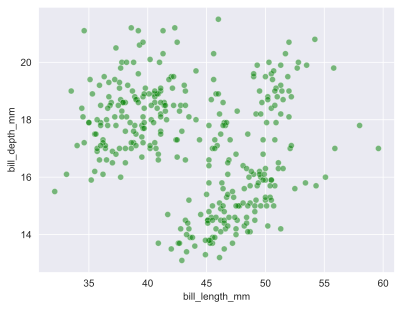

In [21]:
sns.scatterplot(data=penguins,
                x='bill_length_mm',
                y='bill_depth_mm',
                color='green',
                alpha=0.5);

**Параметр s**

Параметр `s` функции `sns.scatterplot()` управляет размером точек на графике рассеяния. Этот параметр принимает числовое значение.

Увеличим размер точек на графике:

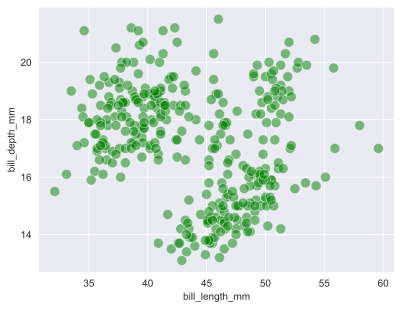

In [22]:
sns.scatterplot(data=penguins,
                x='bill_length_mm',
                y='bill_depth_mm',
                color='green',
                alpha=0.5,
                s=100);

**Параметр marker**

Параметр `marker` в функции sns.scatterplot() определяет форму маркеров (точек) на графике рассеяния.

Вот некоторые из доступных кодов маркеров:
- `o`: круг;
- `s`: квадрат;
- `^`: треугольник вверх;
- `v`: треугольник вниз;
- `>`: треугольник вправо;
- `<`: треугольник влево;
- `x`: крестик;
- `*`: звёздочка;
- `D`: ромб;
- `H`: шестиугольник.

Например, поменяем кружочки на квадратики:

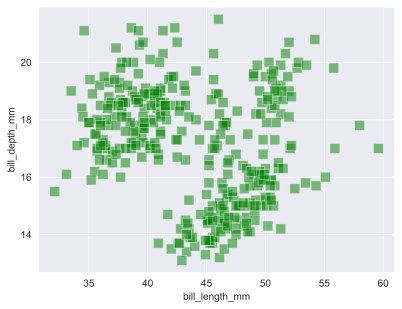

In [23]:
sns.scatterplot(data=penguins,
                x='bill_length_mm',
                y='bill_depth_mm',
                color='green',
                alpha=0.5,
                s=100,
                marker='s');

**Параметр hue**

Параметр `hue` ("хью") используется для добавления дополнительного измерения к графику рассеяния путем изменения цвета точек в зависимости от значений указанной категории, что позволяет визуализировать различия между группами данных на одном графике.

Параметру hue передаётся имя той переменной, по которой мы хотим произвести разделение точек на группы. Например, разделим пигвинов по принадлежности к тому или иному острову:

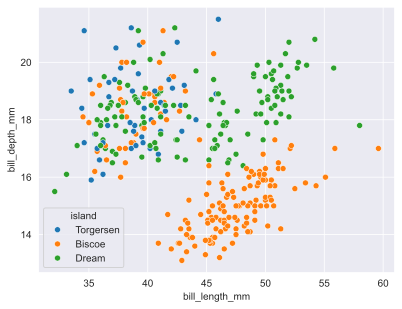

In [24]:
sns.scatterplot(data=penguins,
                x='bill_length_mm',
                y='bill_depth_mm',
                hue='island');

Или разделим на группы по видам пингвинов:

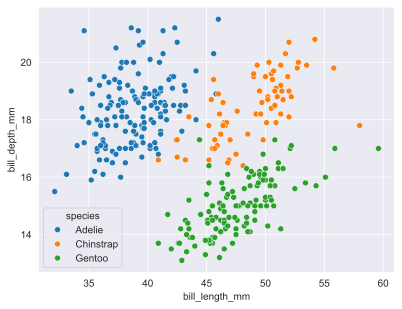

In [25]:
sns.scatterplot(data=penguins,
                x='bill_length_mm',
                y='bill_depth_mm',
                hue='species');

Посмотрев на эти два графика, можно прийти к некоторому умозаключению, что пингвины вида *Adelie* обитают на всех трёх островах, в отличие от представителей двух других видов.

Параметру `hue` можно передавать не только категориальную переменную, но и количественную. Например, посмотрим на распределение данных с группировкой по массе тела пингвинов:

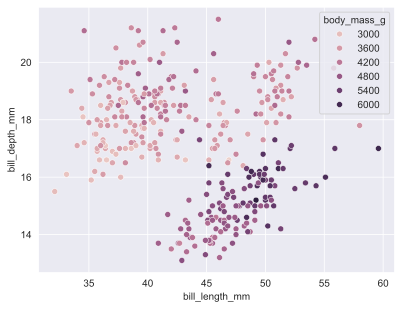

In [26]:
sns.scatterplot(data=penguins,
                x='bill_length_mm',
                y='bill_depth_mm',
                hue='body_mass_g');

В этом случае мы наблюдаем, как пингвины с различной массой тела распределились по разным группам, и каждая из них получила свой уникальный цветовой оттенок.

Из этого рисунка можно заключить, что пингвины, расположенные в правой нижней четверти графика, обладают более значительной массой тела по сравнению с остальными.

**Параметр hue_norm**
Параметр `hue_norm` используется для нормализации цветовой шкалы при отображении данных с помощью параметра `hue`. Параметру передаётся кортеж с минимальным и максимальным значениями, в пределах которых цветовая палитра будет меняться от самого светлого тона до самого тёмного. Это может пригодиться в случаях, когда вы хотите акцентировать внимание на определенном диапазоне значений.

Например, сделаем так, чтобы оттенки менялись только у точек, соответствующих массе пингвинов от 2700 до 4000:

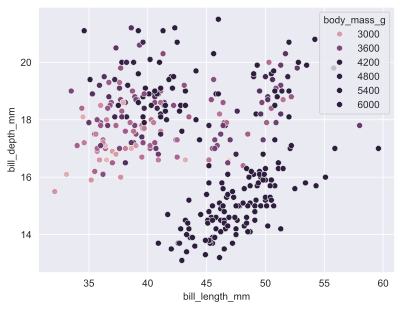

In [28]:
sns.scatterplot(data=penguins,
                x='bill_length_mm',
                y='bill_depth_mm',
                hue='body_mass_g',
                hue_norm=(2700, 4000));

В этом примере точки, соответствующие массе пингвинов свыше 4000 грамм, окрашены в максимально тёмный цвет для этой палитры. 

**Параметр hue_order**
Параметр `hue_order` используется для определения порядка категорий, которые будут отображаться в графике рассеяния при использовании параметра `hue`. Он принимает список значений, которые определяют порядок отображения категорий, что позволяет контролировать, какие цвета будут назначены конкретным категориям.

Для примера изменим порядок отображения видов пингвинов:

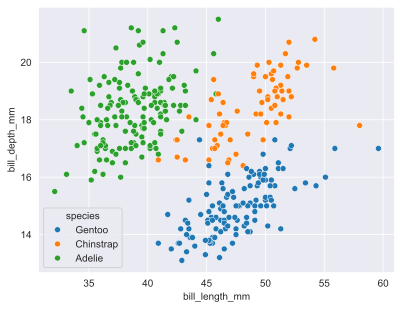

In [29]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
                hue='species',
                hue_order=['Gentoo', 'Chinstrap', 'Adelie']);

**Параметр style**
  
Параметр `style` в функции `sns.scatterplot()` используется для изменения стиля (формы) точек в зависимости от значений указанной переменной. Это позволяет добавить еще одно измерение к визуализации данных, делая график более информативным и наглядным.

Например, установим форму точек в зависимости от вида пингвинов:

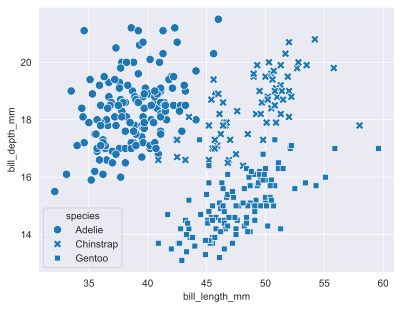

In [31]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
                style='species',
                s=70);

Разбиение точек на категории по их форме может быть полезным при печати графика в чёрно-белом формате.

Параметр `style` может быть использован вместе с `hue`, что позволяет одновременно использовать цвет и форму точек для отображения дополнительных измерений данных.

Например, добавим на предыдущий график ещё и разделение по цвету:

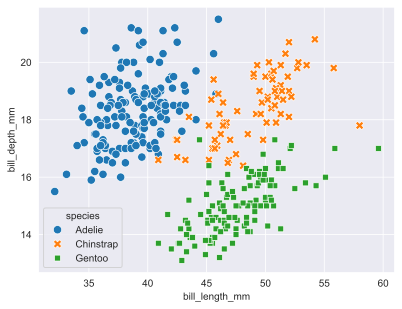

In [32]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
                style='species',
                s=70,
                hue='species');

Или используем переменную `island` для разбиения точек по цвету:

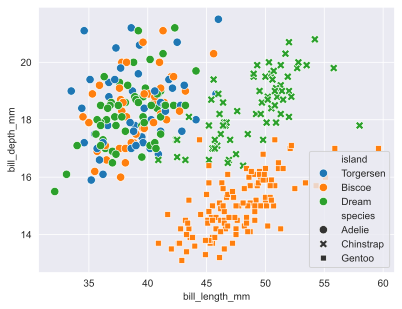

In [33]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
                style='species',
                s=70,
                hue='island');

Из этого графика наглядно видно, что пингвины вида *Adelie* обитают на всех трёх островах, в отличие от представителей двух других видов.

**Параметр markers**

С помощью параметра `markers` (не путать с другим параметром - параметр `marker`) можно задать, какие формы будут использоваться для различных категорий данных. Он используется вместе с параметром `style`.

Для примера зададим собственные формы маркеров для различных категорий:

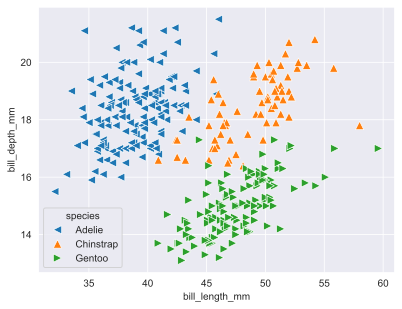

In [34]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
                style='species',
                s=70,
                hue='species',
                markers=['<', '^', '>']);

**Параметр size**

Параметр `size` позволяет задать переменную, по значениям которой будут изменяться размеры точек на графике. Этот параметр может работать как с категориальными, так и с числовыми данными, но наиболее полезен при работе с числовыми данными, так как размеры точек будут пропорциональны значениям этой переменной. Например:

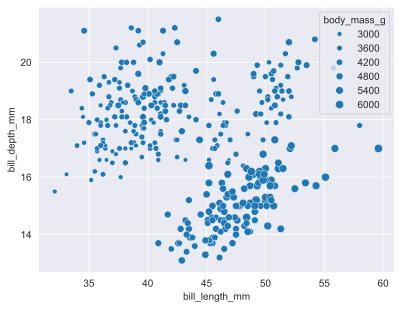

In [35]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
                size='body_mass_g');

На этом графике, чем выше масса пингвина, тем больше диаметр точки на диаграмме.

Или, например, использование параметра `size` с категориальной переменной, совместно с параметром `hue`:

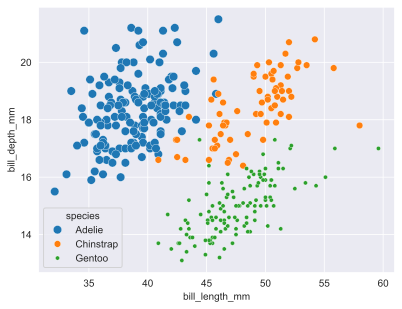

In [36]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
                size='species',
                hue='species');

Применение параметра `size` с категориальными переменными может пригодиться в случаях, когда присутствует ранговость в категориях.

**Параметр sizes**

Параметр `sizes` функции `sns.scatterplot()` используется для задания диапазона размеров точек на графике. Этот параметр позволяет контролировать минимальный и максимальный размеры точек, делая визуализацию более понятной и информативной.

Пример использования параметра `sizes` с количественной переменной `body_mass_g`:

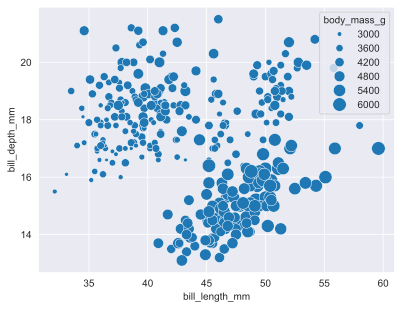

In [37]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
                size='body_mass_g',
                sizes=(5, 200));

Применение параметра `sizes` с категориальной переменной (например, `size='species'`), позволяет задать собственные размеры точек для каждой категории. 

Например, выделим на графике точки, соответствующие пингвинам вида *Chinstrap*:


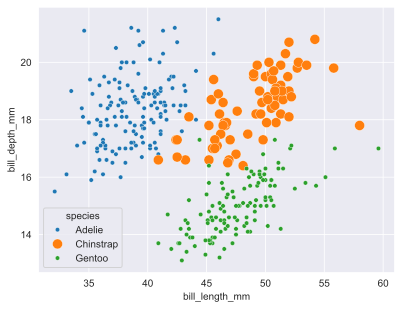

In [38]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
                size='species',
                hue='species',
                sizes=[20, 100, 20]);

Удобно, когда нужно визуально выделить какую-то отдельную категорию данных.

**Параметр palette**

Параметр `palette` используется для задания цветовой палитры, которая будет применяться к точкам на графике в зависимости от значений переменной, указанной в параметре `hue`. По умолчанию используется определённый набор цветов.

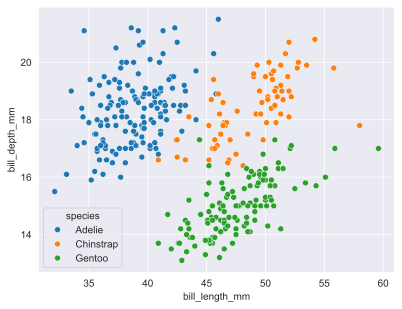

In [39]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
                hue='species');

Посмотреть список доступных палитр можно следующим способом:

In [40]:
print(sns.palettes.SEABORN_PALETTES.keys())

dict_keys(['deep', 'deep6', 'muted', 'muted6', 'pastel', 'pastel6', 'bright', 'bright6', 'dark', 'dark6', 'colorblind', 'colorblind6'])


Эти палитры, по сути, меняют оттенок основной цветовой гаммы, использующейся по умолчанию.

Описание показанных палитр:
- `deep`: Глубокие и насыщенные цвета.
- `muted`: Приглушенные цвета, которые менее насыщенные, чем в deep.
- `bright`: Яркие и насыщенные цвета.
- `pastel`: Светлые и мягкие цвета.
- `dark`: Темные и насыщенные цвета.
- `colorblind`: Палитра, учитывающая дальтонизм.

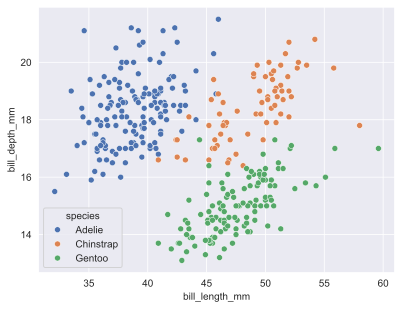

In [41]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
                hue='species',
                palette='deep');

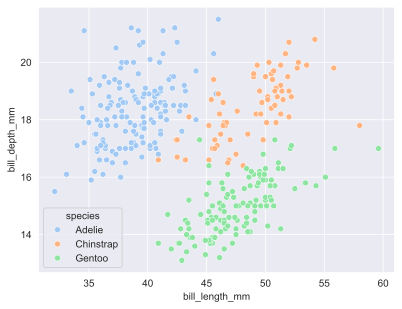

In [42]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
                hue='species',
                palette='pastel');

В библиотеке *seaborn* также доступны для использования цветовые карты из библиотеки *matplotlib*. Посмотреть список цветовых карт можно следующим образом:

In [43]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

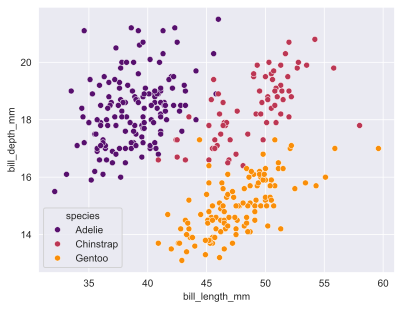

In [44]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
                hue='species',
                palette='inferno');

Для того, чтобы посмотреть какие цвета содержатся в той или иной цветовой палитре, применяется функция `sns.color_palette()`. Для примера посмотрим, какие цвета присутствуют в палитре `'inferno'`:

In [45]:
sns.color_palette('inferno')

[(0.15585, 0.044559, 0.325338),
 (0.397674, 0.083257, 0.433183),
 (0.621685, 0.164184, 0.388781),
 (0.832299, 0.283913, 0.257383),
 (0.961293, 0.488716, 0.084289),
 (0.981173, 0.759135, 0.156863)]

Чтобы отобразить больше цветов, укажите желаемое их количество после названия палитры:

In [46]:
sns.color_palette('inferno', 10)

[(0.076637, 0.041905, 0.205799),
 (0.224763, 0.036405, 0.388129),
 (0.372768, 0.073915, 0.4324),
 (0.522206, 0.12815, 0.419549),
 (0.66454, 0.181539, 0.369846),
 (0.796607, 0.254728, 0.287264),
 (0.902003, 0.364492, 0.184116),
 (0.969163, 0.515946, 0.063488),
 (0.987714, 0.682807, 0.072489),
 (0.960626, 0.859069, 0.29801)]

Метод `as_hex() `позволяет узнать *Hex-коды* цветов палитры. Например:

In [47]:
print(sns.color_palette('inferno', 15).as_hex())

['#0b0724', '#210c4a', '#3d0965', '#57106e', '#71196e', '#8a226a', '#a32c61', '#bc3754', '#d24644', '#e45a31', '#f1731d', '#f98e09', '#fcac11', '#f9cb35', '#f2ea69']


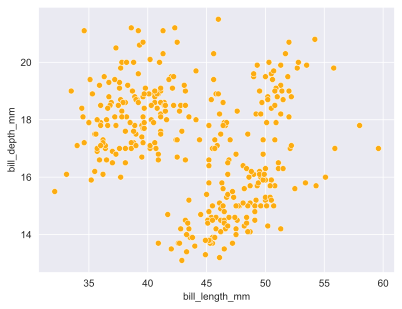

In [48]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
                color='#fcac11');